In [15]:
import pandas as pd
import numpy as np

from sklearn import ensemble

from matplotlib import pyplot as plt
%matplotlib inline


# RF_v1_FE_v2

Model: 
Previously best performing RandomFores model, which did not have the best LB score, but made the highest amount of money so far, it's origin is on ROUND_20160811

Data: 
Polynomial feature engineering, with degree=2 + basic stats, using feature engineered variables. Original data is included. 

In [8]:
# Load data
train = pd.read_csv('Data/FE_v2_train.csv')
test = pd.read_csv('Data/FE_v2_test.csv')
train_y = pd.read_csv('Data/train_y.csv')
submission = pd.read_csv('CleanData/example_predictions.csv')

# Set models
params_rf = {'oob_score': True, 
             'n_jobs': 4, 
             'verbose': 0, 
             'min_samples_leaf': 10, 
             'n_estimators': 250, 
             'max_features': 50, 
             'random_state': 42, 
             'criterion': 'gini', 
             'min_samples_split': 5, 
             'max_depth': 5
            }
model_rf = ensemble.RandomForestClassifier(**params_rf)

# Fit model, and make predictions
model_rf.fit(train, train_y.target)
predictions = model_rf.predict_proba(test.iloc[:,1:])

submission.probability = predictions[:,1]

In [23]:
model_rf.get_params

<bound method RandomForestClassifier.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=50, max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=4,
            oob_score=True, random_state=42, verbose=0, warm_start=False)>

In [10]:
pd.DataFrame.to_csv(submission, 'Submissions/RFv1_FEv2.csv', index=False)

# Score: 0.69083

Which is a bit lower than it was couple of weeks ago, but stil an allright score. 

### Some analysis on this model

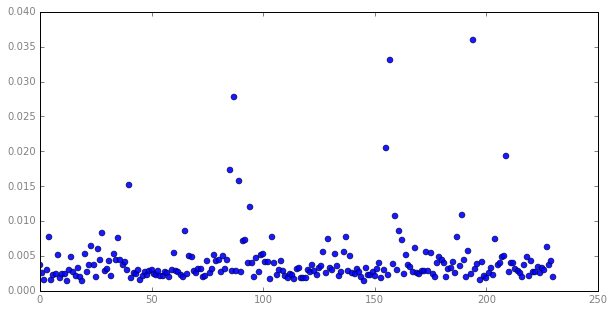

In [44]:
# model_rf's feature importance

fig = plt.figure()
fig.set_size_inches(10,5)
plt.yticks(color='grey')
plt.xticks(color='grey')


plt.plot(model_rf.feature_importances_[:-6], 'o', color='blue', alpha=.9)

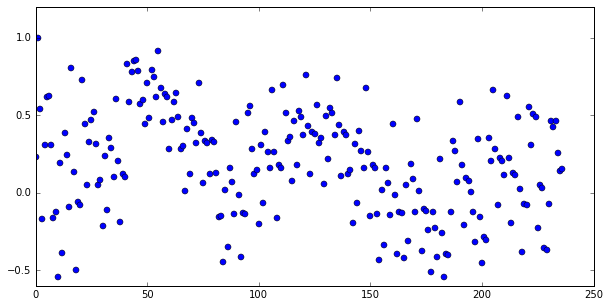

In [56]:
# plot of correlations between features in the train dataset
correl_matrix = train.corr()
fig = plt.figure()
fig.set_size_inches(10,5)

plt.plot(np.array(correl_matrix.iloc[:,1]), 'o')

Well... this is where we might start working on... There are lot of highly correlated variables after polynomial engineering. 

TODO: 
- Feature selection by using feature importance - select least important features of the random forest model, and then check the correlations in the correlation matrix, drop the ones with hig correlations. 

But still, we need to focus on feature engineering... We can give a try to estimate t_id for the train set, or we can try to give it a column containing the ordering. 

We still haven't done anything with the similarity thingy... 

